# An KNN model for the Wine dataset

## Index
### Dataset
### Visualizing the Dataset
#### > 3D Visualization
#### > 2D Visualization
### Building the model
### Visualizing the Results
#### > Confusion Matrix Visualization
#### > 2D Boundry Visualization
### Bonus Content

## Dataset

In [31]:
from sklearn.datasets import load_wine
wine = load_wine()

x = wine.data
y = wine.target
class_names = wine.target_names

print(x.shape," ",y.shape)


(178, 13)   (178,)


## Visualizing the Dataset

### 3D Visualization

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(x)

print(pca_result.shape)

x1 = pca_result[:,0]
x2 = pca_result[:,1] 
x3 = pca_result[:,2]

(178, 3)


In [3]:
# %matplotlib widget -> uncomment for interactive widgets

In [4]:
from random import randint
def get_colors(N):
    colors=[]
    for i in range(0,N):
        colors.append('#{:06x}'.format(randint(0, 256**3)))
    return colors

In [5]:
def get_handles(colors):
    handles=[]
    for i in range(len(colors)):
        handles.append(mpatches.Patch(color=colors[i], label='Class'+str(i)))
    return handles

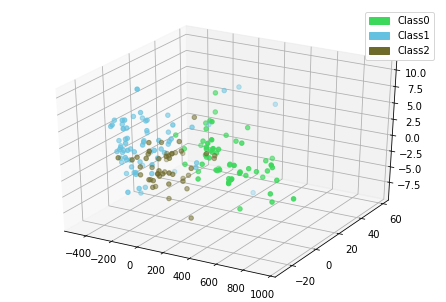

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = Axes3D(fig)
colors = get_colors(len(np.unique(y)))

ax.scatter(x1,x2,x3,c=y,cmap=matplotlib.colors.ListedColormap(colors))

plt.legend(handles=get_handles(colors))
# plt.legend(loc='best')
plt.show()

### 2D Visualization

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)

print(pca_result.shape)

x1 = pca_result[:,0]
x2 = pca_result[:,1]

(178, 2)


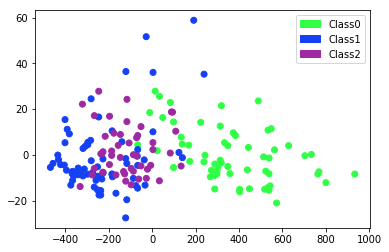

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#the dataset has len(np.unique(y)) Classes
colors = get_colors(len(np.unique(y)))

ax.scatter(x1,x2,c=y,cmap=matplotlib.colors.ListedColormap(colors))

plt.legend(handles=get_handles(colors))

plt.show()

## Preparing the Data

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2,random_state=12)

## Building the Model

In [16]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(x_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [17]:
y_pred=svm.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

## Visualizing the Results

### Confusion Matrix Visualization

Confusion matrix, without normalization
[[14  0  0]
 [ 0 11  0]
 [ 0  0 11]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


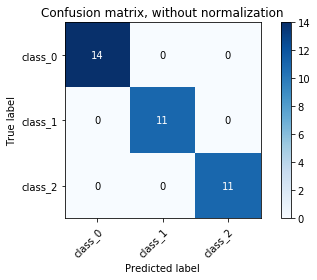

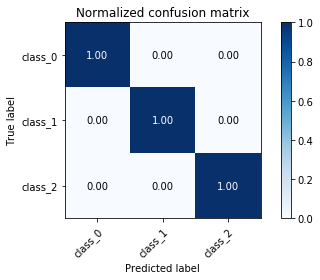

In [32]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### 2D Boundry Visualization

Task 1-> Perform PCA; Get min and max array values for 2D visualization

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)

print(pca_result.shape)

x1 = pca_result[:,0]
x2 = pca_result[:,1]

(178, 2)


In [20]:
x1_min, x1_max = x1.min() - 10, x1.max() + 10
x2_min, x2_max = x2.min() - 10, x2.max() + 10

Task 2-> Get Grid

In [21]:
import numpy as np
resolution=10
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))

In [22]:
xx1.shape

(11, 143)

In [23]:
xx2.shape

(11, 143)

Task 3-> Get Reverse PCA Values

In [24]:
temp_points=[]
for i in range(xx1.shape[0]):
    for j in range(xx1.shape[1]):
        temp_points.append([xx1[i,j],xx2[i,j]])
temp_points=np.array(temp_points)

In [25]:
temp_points.shape

(1573, 2)

In [26]:
original_space_temp_points=pca.inverse_transform(temp_points)

Task 4-> Predict Results

In [27]:
Z=neigh.predict(original_space_temp_points)

Task 5-> Plot points and boundries

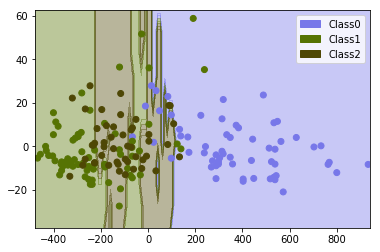

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib


Z = Z.reshape(xx1.shape)

colors = get_colors(len(np.unique(y)))

plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.scatter(x1,x2,c=y,cmap=matplotlib.colors.ListedColormap(colors))

plt.legend(handles=get_handles(colors))

plt.show()

## Bonus Content

* [Towards Data Science](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)